# EDA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('data/trading_data.csv')

## Пропущенные значения

В колонках Stock и Type есть мусор, почистим его:

In [2]:
data['Stock'].value_counts()[:10]

AAPL            29
Nancy Pelosi    16
V               13
MSFT             8
DIS              8
NVDA             7
CRM              7
AMZN             7
FB               6
HTZ              6
Name: Stock, dtype: int64

In [3]:
data['Type'].value_counts()[:10]

ST      67
None    44
OP      38
AB      11
OL       2
PS       1
OT       1
Name: Type, dtype: int64

In [4]:
data['Stock'] = data['Stock'].apply(lambda x: x if x != 'Nancy Pelosi' else np.nan)
data['Type'] = data['Type'].apply(lambda x: x if x != 'None' else np.nan)

Теперь можно посмотреть на пропущенные значения в целом

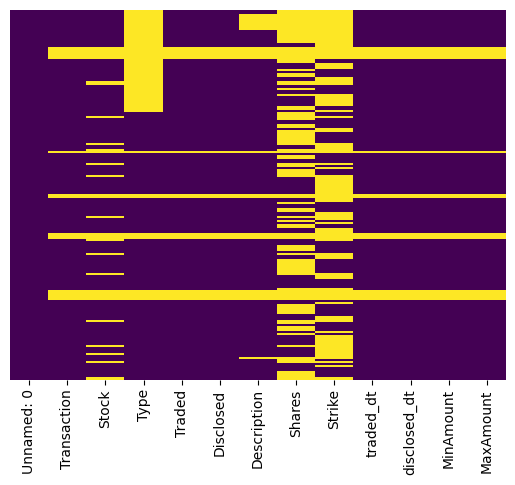

In [5]:
import seaborn as sns

sns_heatmap = sns.heatmap(data.isnull(), 
                          yticklabels=False, 
                          cbar=False,
                          cmap='viridis')

Наблюдения, в которых нет тикера акции, нам не интересны, от них можно избавиться:

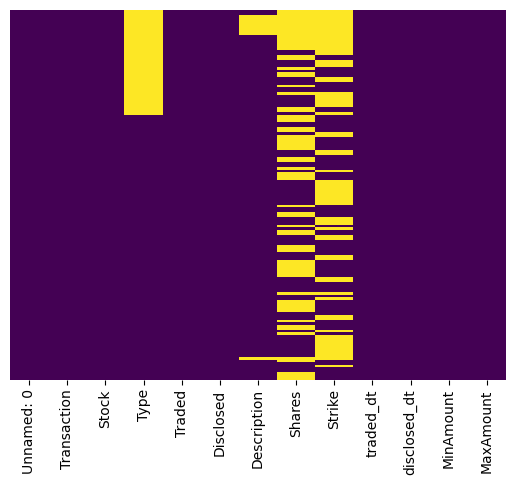

In [6]:
data = data.query('Stock.notna()')
sns_heatmap = sns.heatmap(data.isnull(), 
                          yticklabels=False, 
                          cbar=False,
                          cmap='viridis')

## Типы сделок

Text(0, 0.5, 'Верхняя граница суммы сделки')

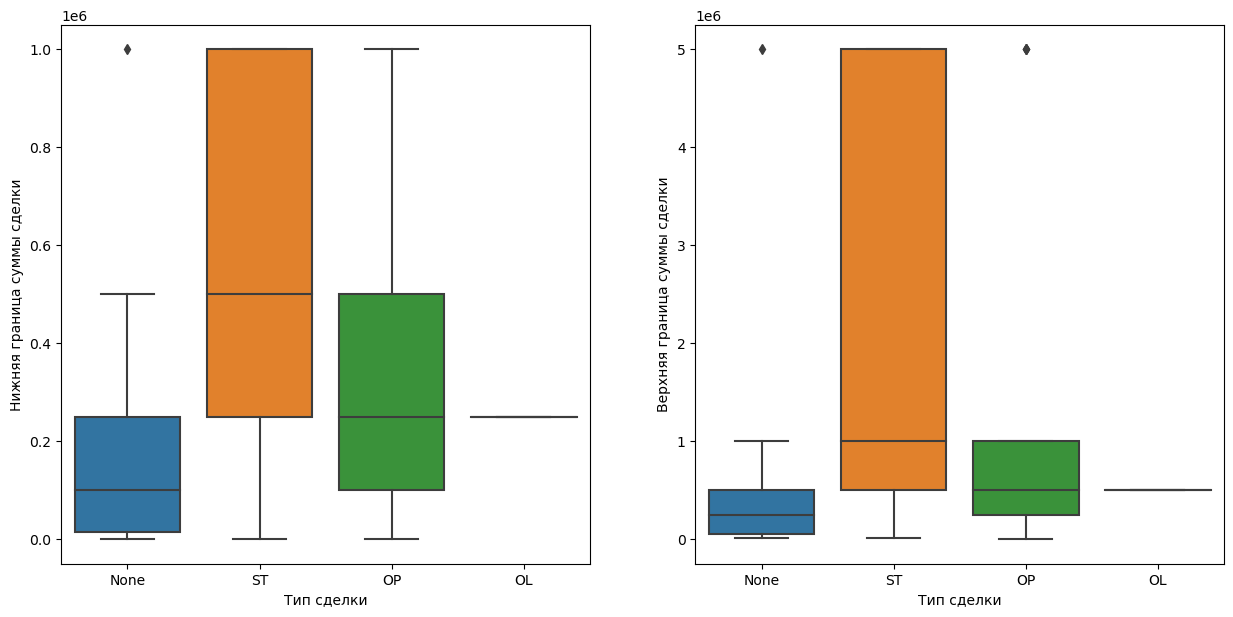

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,2, figsize=(15,7))

tmp = data.fillna('None')
sns.boxplot(x='Type', y='MinAmount', data=tmp, ax=ax[0])
ax[0].set_xlabel('Тип сделки')
ax[0].set_ylabel('Нижняя граница суммы сделки')

sns.boxplot(x='Type', y='MaxAmount', data=tmp, ax=ax[1])
ax[1].set_xlabel('Тип сделки')
ax[1].set_ylabel('Верхняя граница суммы сделки')

Посмотрим на каждый из типов сделок

In [8]:
data.query('Type=="ST"').sample(3)

,Unnamed: 0,Transaction,Stock,Type,Traded,Disclosed,Description,Shares,Strike,traded_dt,disclosed_dt,MinAmount,MaxAmount
84,84,Sale,AAPL,ST,"May. 08, 2020","Jun. 09, 2020","SOLD 3,300 SHARES.",3300.0,NaN,2020-05-08,2020-06-09,1000001.0,5000000.0
100,100,Purchase,CRWD,ST,"Sep. 03, 2020","Oct. 04, 2020","PURCHASED 5,000 SHARES.",5000.0,NaN,2020-09-03,2020-10-04,500001.0,1000000.0
108,108,Purchase,AB,ST,"Feb. 23, 2021","Mar. 09, 2021","PURCHASED 25,000 SHARES.",25000.0,NaN,2021-02-23,2021-03-09,500001.0,1000000.0


In [9]:
data.query('Type=="OP"').sample(3)

,Unnamed: 0,Transaction,Stock,Type,Traded,Disclosed,Description,Shares,Strike,traded_dt,disclosed_dt,MinAmount,MaxAmount
61,61,Purchase,CRM,OP,"Jun. 18, 2019","Jul. 11, 2019",PURCHASED 80 CALL OPTIONS WITH A STRIKE PRICE ...,NaN,140.0,2019-06-18,2019-07-11,100001.0,250000.0
105,105,Purchase,DIS,OP,"Dec. 22, 2020","Jan. 21, 2021",PURCHASED 100 CALL OPTIONS WITH A STRIKE PRICE...,NaN,100.0,2020-12-22,2021-01-21,500001.0,1000000.0
177,177,Purchase,NVDA,OP,"Nov. 22, 2023","Dec. 21, 2023",PURCHASED 50 CALL OPTIONS WITH A STRIKE PRICE ...,NaN,120.0,2023-11-22,2023-12-21,1000001.0,5000000.0


In [10]:
data.query('Type=="OL"')

,Unnamed: 0,Transaction,Stock,Type,Traded,Disclosed,Description,Shares,Strike,traded_dt,disclosed_dt,MinAmount,MaxAmount
136,136,Purchase,AB,OL,"Jan. 27, 2022","Feb. 28, 2022","PURCHASED 10,000 UNITS IN A GLOBAL ASSET MANAG...",NaN,NaN,2022-01-27,2022-02-28,250001.0,500000.0


In [11]:
data.query('Type.isna()').sample(3)

,Unnamed: 0,Transaction,Stock,Type,Traded,Disclosed,Description,Shares,Strike,traded_dt,disclosed_dt,MinAmount,MaxAmount
24,24,Purchase,HTZ,NaN,"Jul. 15, 2015","Jul. 28, 2015",PURCHASE OF 42 CALL OPTIONS WITH A STRIKE PRIC...,NaN,14.0,2015-07-15,2015-07-28,15001.0,50000.0
33,33,Sale,MGRC,NaN,"Jul. 21, 2016","Aug. 17, 2016","SALE OF 8,000 SHARES",8000.0,NaN,2016-07-21,2016-08-17,250001.0,500000.0
30,30,Purchase,DIS,NaN,"Jan. 15, 2016","Feb. 17, 2016","EXERCISED 100 CALL OPTIONS (10,000 SHARES) EXP...",10000.0,90.0,2016-01-15,2016-02-17,500001.0,1000000.0


Оставляем только сделки с акциями:

In [12]:
data = data.query('Type=="ST"')

## Частота сделок

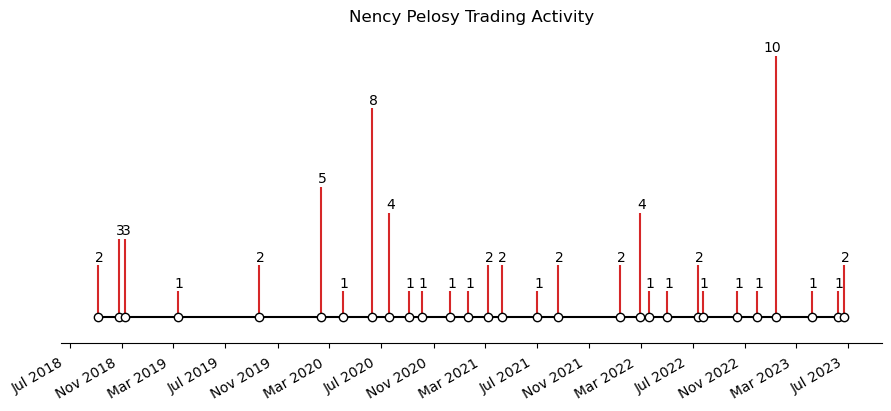

In [14]:
import matplotlib.dates as mdates
from datetime import datetime

# Источник - https://matplotlib.org/stable/gallery/lines_bars_and_markers/timeline.html

group = data.groupby('disclosed_dt', as_index=False).size()
dates = group['disclosed_dt']
dates = [datetime.strptime(d, "%Y-%m-%d") for d in dates]
names = group['size']

fig, ax = plt.subplots(figsize=(8.8, 4), layout="constrained")
ax.set(title="Nency Pelosy Trading Activity")

ax.vlines(dates, 0, names, color="tab:red")
ax.plot(dates, np.zeros_like(dates), "-o",
        color="k", markerfacecolor="w") 

for d, r in zip(dates, names):
    ax.annotate(r, xy=(d, r),
                xytext=(4, np.sign(r)*3), textcoords="offset points",
                horizontalalignment="right")

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=4))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %Y "))
plt.setp(ax.get_xticklabels(), rotation=30, ha="right")

ax.yaxis.set_visible(False)
ax.spines[["left", "top", "right"]].set_visible(False)

ax.margins(y=0.1)
plt.show()

In [15]:
data.to_csv('data/clean_data.csv')